## Generating Clothing Product Descriptions - Notebook 1


#### Importing Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
import requests
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
from wordcloud import WordCloud, STOPWORDS
import string
import re
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"
%matplotlib inline
import h5py
import Scraping # Python file created for 

Using TensorFlow backend.


#### Notes for Self:

1. Think of saving scrapped data into a suitable data-structure
2. Look for image captioning videos
3. Look into LSTMs (seq2seq) modelling 
4. Try Scraping data from multiple websites
5. Perform EDA on the data that you scrape
6. Try hands on Data Cleaning (Stemming, Lemmas, Stop words) is it needed though?.


#### Building a basic LSTM Model

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed

#### Scraping Data from the list of websites (Function shifted to a seperate python file (refer Scraping.py ) )

In [0]:
clothing_urls = ["https://www.coggles.com/man/new-arrivals/accessories-and-bags.list",
                 "https://www.coggles.com/woman/new-arrivals/accessories.list",
                 "https://www.coggles.com/man/new-arrivals.list?facetFilters=categoryLevel2:Clothing",
                 "https://www.coggles.com/woman/new-arrivals.list?facetFilters=categoryLevel2:Clothing"]

import requests
import bs4

""" To get the number of pages per url"""
url_pages = list()
dict_url = {}
for url in clothing_urls:
    response = requests.get(url)
    content = response.content.decode('utf-8')
    soup = bs4.BeautifulSoup(content)
    
    if len(soup.find_all('nav', {'class':'responsivePaginationPages'})) != 0:
        num_pages = int(soup.find_all('nav', {'class':'responsivePaginationPages'})[0]['data-total-pages'])
        dict_url[url] = num_pages
    else:
        dict_url[url] = 0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [0]:
main_ = "https://www.coggles.com"

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    """ Removes the html tags from the extracted text"""
    
    return TAG_RE.sub('', text)

In [0]:
clothe_descriptions = Scraping.scrape_clothes(dict_url)

In [0]:
clothe_descriptions  # List of all the descriptions
len(clothe_descriptions)

784

#### Creating a file and saving all our product descriptions

In [0]:
file = open("file.txt","w") 
for i in clothe_descriptions:
    file.write(i)
    file.write("\n")
file.close() 

# print(f.read())
# f.close()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving file.txt to file.txt


In [0]:
f = open("file.txt", "r", encoding = "utf8", errors='ignore')

#### Word Cloud

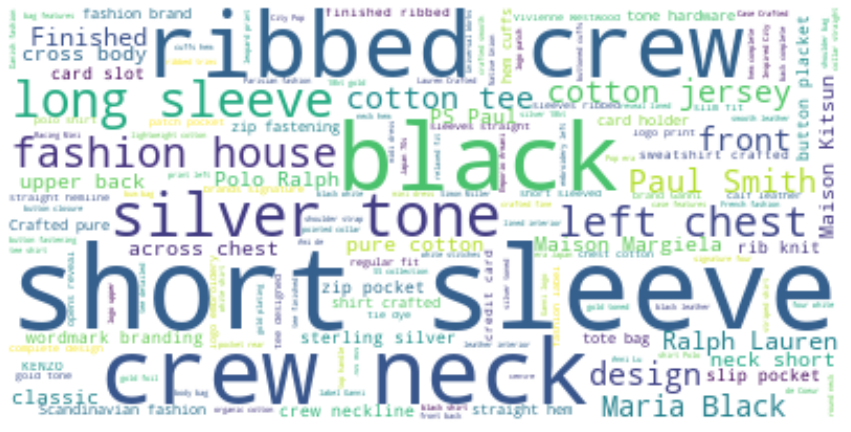

In [12]:
text = ''.join(desc for desc in f)
wordcloud = WordCloud(max_font_size=100, max_words=150, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Average Length of Descriptions

In [0]:
length_of_descriptions = []
for i in clothe_descriptions:
    length_of_descriptions.append(len(i.strip().split()))
print("Average Length of descriptions:", int(np.mean(length_of_descriptions)))
print("Maximum Length of descriptions:", max(length_of_descriptions))

#### Data Cleaning 

1. Removing punctuations
2. Using only Alpanumeric Characters
3. Converting all characters to lower case

In [0]:
def clean_cloth_descriptions(text):
    """This function generates product descriptions after cleaning the data"""
    token = text.split()
    table = str.maketrans("", "", string.punctuation)  #Remove Punctuations
    tokens = [w.translate(table) for w in token]
    tokens = [word for word in tokens if word.isalnum()]  #Alpha numeric characters only
    tokens = [word.lower() for word in tokens]  # Lower case 
    return tokens
cleaned_desc = clean_cloth_descriptions(text)

In [14]:
cleaned_desc

['uniquely',
 'handcrafted',
 'by',
 'marceneiros',
 'local',
 'artisans',
 'from',
 'sustainablysourced',
 'brazilian',
 'wood',
 'offcuts',
 'the',
 'trancoso',
 'beach',
 'bat',
 'is',
 'the',
 'heritage',
 'product',
 'of',
 'rioinspired',
 'brand',
 'frescobol',
 'carioca',
 'designed',
 'for',
 'frescobol',
 'a',
 'game',
 'hailing',
 'from',
 'the',
 'iconic',
 'copacabana',
 'beach',
 'that',
 'perfectly',
 'encapsulates',
 'the',
 'carioca',
 'spirit',
 'after',
 'the',
 'brands',
 'logo',
 'is',
 'heatstamped',
 'above',
 'the',
 'handle',
 'the',
 'racket',
 'is',
 'dipped',
 'in',
 'a',
 'glossy',
 'sea',
 'and',
 'sandresistant',
 'resin',
 'coating',
 'and',
 'fitted',
 'with',
 'a',
 'red',
 'neoprene',
 'grip',
 'comes',
 'with',
 'a',
 'protective',
 'drawstring',
 'bag',
 'uniquely',
 'handcrafted',
 'by',
 'marceneiros',
 'local',
 'artisans',
 'from',
 'sustainablysourced',
 'brazilian',
 'wood',
 'offcuts',
 'the',
 'trancoso',
 'beach',
 'bat',
 'is',
 'the',
 'he

In [15]:
unique_words_clothes = len(set(clean_cloth_descriptions(text)))
print("Number of Unique Words:", unique_words_clothes)

tokens_clothes = clean_cloth_descriptions(text)

total_words_clothes = len(clean_cloth_descriptions(text))
print("Number of Words", total_words_clothes)

Number of Unique Words: 1699
Number of Words 37436


#### Training on word sequences of length 47 words, model will predict the 48th word; this will continue for the entire dataset. 

The size of training sequences can be a hyperparameter here. Training our model on smaller word sequences may produce better results. For instance, a word sequence of length 10 may continue to produce text in relation with the same product descripton (or will it?; This will be explored in a new notebook)


In [16]:
length = 47 + 1
lines = []
for i in range(length, total_words_clothes):
    seq = tokens_clothes[i-length:i]
    line = ' '.join(seq)
    lines.append(line)
lines  #Print to get a view of how the lines look like

['uniquely handcrafted by marceneiros local artisans from sustainablysourced brazilian wood offcuts the trancoso beach bat is the heritage product of rioinspired brand frescobol carioca designed for frescobol a game hailing from the iconic copacabana beach that perfectly encapsulates the carioca spirit after the brands logo is heatstamped above',
 'handcrafted by marceneiros local artisans from sustainablysourced brazilian wood offcuts the trancoso beach bat is the heritage product of rioinspired brand frescobol carioca designed for frescobol a game hailing from the iconic copacabana beach that perfectly encapsulates the carioca spirit after the brands logo is heatstamped above the',
 'by marceneiros local artisans from sustainablysourced brazilian wood offcuts the trancoso beach bat is the heritage product of rioinspired brand frescobol carioca designed for frescobol a game hailing from the iconic copacabana beach that perfectly encapsulates the carioca spirit after the brands logo is

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines) #Converting words into numbers(Embeddings)

In [0]:
sequences = np.asarray(sequences)
# for i in sequences:
#     print(len(i))
X , y= sequences[:,:-1], sequences[:,-1] 

#### It is important to note how our data is represented. X represents the sequence that goes in as input and y represents the word that the model will predict based on the input sequence! 37388 sentences of length 47 will be used for training!

In [19]:
X.shape, y.shape  

((37388, 47), (37388,))

In [0]:
y = to_categorical(y, num_classes = unique_words_clothes + 1)

In [0]:
sequence_length = X.shape[1]

#### Building LSTM Model

##### Architecture:

Embedding Layer > LSTM  > LSTM  > LSTM  > Dense  > Output Layer

In [22]:
model2 = Sequential()
model2.add(Embedding(input_dim = unique_words_clothes + 1, output_dim = 47, input_length = sequence_length))
model2.add(LSTM(128, return_sequences = True))
model2.add(LSTM(128, return_sequences = True))
model2.add(LSTM(128))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(unique_words_clothes + 1, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 47, 47)            79900     
_________________________________________________________________
lstm (LSTM)                  (None, 47, 128)           90112     
_________________________________________________________________
lstm_1 (LSTM)                (None, 47, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1700)              2

In [0]:
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [29]:
import torch
gpu = tf.test.gpu_device_name

device_name = tf.test.gpu_device_name()

device_name

if torch.cuda.is_available():
  device=torch.device("cuda")

  print('There are %d GPU(s) available.' % torch.cuda.device_count())

  print('We will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print('No GPU available')

There are 1 GPU(s) available.
We will use the GPU:  Tesla P4


In [30]:
model2.fit(X, y , batch_size = 100, epochs = 100, use_multiprocessing=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 37388 samples
Epoch 1/100
37388/37388 [==============================] - 77s 2ms/sample - loss: 6.1756
Epoch 2/100
37388/37388 [==============================] - 67s 2ms/sample - loss: 5.7688
Epoch 3/100
37388/37388 [==============================] - 67s 2ms/sample - loss: 5.2497
Epoch 4/100
37388/37388 [==============================] - 67s 2ms/sample - loss: 4.8820
Epoch 5/100
37388/37388 [==============================] - 66s 2ms/sample - loss: 4.7652
Epoch 6/100
37388/37388 [==============================] - 66s 2ms/sample - loss: 4.6741
Epoch 7/100
37388/37388 [==============================] - 67s 2ms/sample - loss: 4.2234
Epoch 8/100
37388/37388 [==============================] - 68s 2ms/sample - loss: 3.9846
Epoch 9/100
37388/37388 [==============================] - 68s 2ms/sample - loss: 3.7492
Epoch 10/100
37388/37388 [==============================] - 69s 2ms/sample - loss:

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# model2.save_weights('Product_desc_weights.h5')
# model2.save("LSTM_model.h5')

#### Generate Descriptions 

In [0]:
def product_description_clothes(model, tokenizer, text_sequence_length, seed_text, description_length):
    text = []
#     predicted_word = []
    for i in range(description_length):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded], maxlen = text_sequence_length, truncating = 'pre')
        
        y_prediction = model.predict_classes(encoded)
        
        predicted_word = ""
        
        for word, index in tokenizer.word_index.items():
            if index == y_prediction:
                predicted_word = word
                text.append(predicted_word)
                seed_text = seed_text[1:] + ' ' + predicted_word
    return ' '.join(text)

#### Testing the results on text it has never seen before!!

In [0]:
seed_text = ["A reimagining of a classic skeet jacket, this cardigan was inspired by vintage Southwestern trade blankets.",
             "A knit crop top featuring a one-shoulder design, sleeveless cut, midriff cutout, and a side self-tie closure.",
             "With an ultra-flattering silhouette made from easy-to-move-in stretch linen, this faux-wrap dress gives wear-to-work a whole new meaning, as in, wear to work, wear to dinner, really wear anywhere.",
             "Introducing Gretchen: Our new, ultra-walkable sandals with soft, padded footbed and the tiniest bit of a wedge at the heel.",
             "Give me more. This graphic tee features a crew neckline, relaxed silhouette and 'The Beatles A Hard Days Night I Should of Known Better' album graphic at front."]


In [41]:
for i in seed_text:
  print(" INPUT DESCRIPTION: ", "\n", i)
  print("MODEL GENERATED PRODUCT DESCRIPTION:", "\n",  product_description_clothes(model2, tokenizer, sequence_length, i, 47))

 INPUT DESCRIPTION:  
 A reimagining of a classic skeet jacket, this cardigan was inspired by vintage Southwestern trade blankets.A unique jacquard-knit pattern evokes the artisanship of hand-dyed yarn, and a special fade treatment gives the piece an elegantly-weathered look. If jackets are your thing you should do for it
MODEL GENERATED PRODUCT DESCRIPTION: 
 sleeves pleated georgette tusk fly with an compact form combining an outer layer the case features a chain name juxtaposed on the front the shiftstyle dress juxtaposed on the brands signature tiger design is on the left chest finished with a hidden metal crew combining hem and
 INPUT DESCRIPTION:  
 A knit crop top featuring a one-shoulder design, sleeveless cut, midriff cutout, and a side self-tie closure.
MODEL GENERATED PRODUCT DESCRIPTION: 
 showcasing the classic comfort of a multicoloured element to the side cotton enhance and a lined interior with space for all sleeves on the black lined interior with ample storage space n

#### Insights!

Description 1

###### Input: 

"A reimagining of a classic skeet jacket, this cardigan was inspired by vintage Southwestern trade blankets.A unique jacquard-knit pattern evokes the artisanship of hand-dyed yarn, and a special fade treatment gives the piece an elegantly-weathered look. If jackets are your thing you should do for it"

###### Output:

"sleeves pleated georgette tusk fly with an compact form combining an outer layer the case features a chain name juxtaposed on the front the shiftstyle dress juxtaposed on the brands signature tiger design is on the left chest finished with a hidden metal crew combining hem and"


#### Analysis:

The input product description is about a skeet jacket. The model produces text which is a mix, 
(a) Of an accessory (case)
(b) & of a "shiftstyle" dress.

The word "shiftstyle" does not appear in the training corpus. The model seems to have generated it. Similary , "juxtaposed" does not appear in the trainig corpus!

**Fun-fact:** Shift-dress is actually a type of dress (Just Googled it!)

![alt text](shiftdress.jpg "Title")


Though these findings seem interesting, it is not what we expect out of our model. 
Our requirement is for the model to generate the continuation of our input product description.

The model has failed to learn this, probably because of:
1. Long training sequeces (Model is being trained on sentence sequences. As we keep on gliding forward, we input a sequence which is a mix of product descriptions, as a result of which model is not able to distinguish between product descriptions and is generating mix product descriptions ( This observation was made based on the pattern of product descriptions generated by our model)

2. Nature of our input sequences




In [42]:
for i in seed_text:
  print(" INPUT DESCRIPTION: ", "\n", i)
  print("MODEL GENERATED PRODUCT DESCRIPTION:", "\n",  product_description_clothes(model2, tokenizer, sequence_length, i, 20))

 INPUT DESCRIPTION:  
 A reimagining of a classic skeet jacket, this cardigan was inspired by vintage Southwestern trade blankets.A unique jacquard-knit pattern evokes the artisanship of hand-dyed yarn, and a special fade treatment gives the piece an elegantly-weathered look. If jackets are your thing you should do for it
MODEL GENERATED PRODUCT DESCRIPTION: 
 sleeves pleated georgette tusk fly with an compact form combining an outer layer the case features a chain name juxtaposed
 INPUT DESCRIPTION:  
 A knit crop top featuring a one-shoulder design, sleeveless cut, midriff cutout, and a side self-tie closure.
MODEL GENERATED PRODUCT DESCRIPTION: 
 showcasing the classic comfort of a multicoloured element to the side cotton enhance and a lined interior with space for
 INPUT DESCRIPTION:  
 With an ultra-flattering silhouette made from easy-to-move-in stretch linen, this faux-wrap dress gives wear-to-work a whole new meaning, as in, wear to work, wear to dinner, really wear anywhere.
M

#### Insights

Reducing the o/p sequence from 47 to 20 produced the same results as before, just with the generated text truncated at 20 words!

In [44]:
# With shortened input length & o/p length
for i in seed_text:
  print(" INPUT DESCRIPTION: ", "\n", i)
  print("MODEL GENERATED PRODUCT DESCRIPTION:", "\n",  product_description_clothes(model2, tokenizer, sequence_length, i, 20))

 INPUT DESCRIPTION:  
 A reimagining of a classic skeet jacket, this cardigan was inspired by vintage Southwestern trade blankets.
MODEL GENERATED PRODUCT DESCRIPTION: 
 small maria fasten strap divided interior with wall pocket black handles the maria womens leather golden decal features the brand
 INPUT DESCRIPTION:  
 A knit crop top featuring a one-shoulder design, sleeveless cut, midriff cutout, and a side self-tie closure.
MODEL GENERATED PRODUCT DESCRIPTION: 
 showcasing the classic comfort of a multicoloured element to the side cotton enhance and a lined interior with space for
 INPUT DESCRIPTION:  
 With an ultra-flattering silhouette made from easy-to-move-in stretch linen, this faux-wrap dress gives wear-to-work a whole new meaning, as in, wear to work, wear to dinner, really wear anywhere.
MODEL GENERATED PRODUCT DESCRIPTION: 
 a detachable silvertoned fastening at the side seams and fitted kenzo branding at the centre of for of the cold
 INPUT DESCRIPTION:  
 Introducing G

#### Insights for shortened input length & o/p length


The results are not that great. Our model is still struggling to generate meaningful product descriptions. It has rather learned to produce a mix of product descriptions, probably because of the nature of training. 

**Final Insights!**

Model Training:

Observations: 

1. Training a model on product description poses a unique problem in text generation.
2. Since all product descriptions will be independent of each other, training the model becomes challenging as it may learn to produce descriptions which are dependent on previous descriptions (Since we are using LSTMs).
3. For instance, the first product description is about a hoody for males, followed by a stylish top which is suitable for females. Now, when we pass a product description similar to a description as of a male hoody, it is possible for the model to generate a product description for female clothes. 
4. Training data needs to be formatted in the best way possible to get better product descriptions. For example, data of similar products, let's say, male shirts (assume we have 100 shirt descriptions for males) should be clubbed together, followed by a collection of different product category. 
5. Another option would be to develope new models for each category all together, however, that will be highly computaionally expensive and will require a lot time for training. 

Model Evaluation:

Observations:

1. It is interesting how machines can generate text for us. However, there is no established evaluation metric based on which we can judge the output of our model. 
2. There are a few metrics like the BLUE score and BERTscore which have been proposed by researchers, however, they have their own drawbacks. 
3. On of the method that I want to try out is to use BERT to classify the generated text as gramatically correct. To elaborate, the o/p from the LSTM models will go as an input to the BERT model. BERT will treat this as a classification problem and give out result as to the generated description is gramatically correct or not?
4. This method also has its own limitation as one can be concerned about important words being used in the right context (context being the main focus) over the grammar of the generated text.

#### Things to research and try out!
1. Changing i/p length will affect the quality of the o/p

2. Using key words to generate product desriptions. 

3. Hyper-parameters to play with:
Amout of training data, batch size, input sequence length, number of epochs.

4. Additional changes that may work better!
Arrangement of training data (men's clothes........, female clothes........, accessories........etc), word-padding (will that help?)



